# Определение возраста покупателей

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

## Исследовательский анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Загрузим данные
labels = pd.read_csv('/datasets/faces/labels.csv')

# Посмотрим на размер выборки
print('Размер выборки:', labels.shape[0])

labels.describe()

Размер выборки: 7591


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Выборка относительно небольшая, но мы еще можем нарастить ее, применяя аугментации


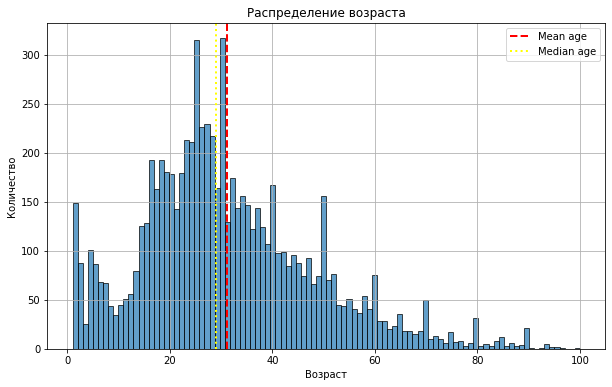

In [3]:
# Построим график распределения возраста в выборке
plt.figure(figsize=(10, 6))
labels['real_age'].hist(bins=100, edgecolor='black', alpha=0.7, grid=True)
plt.axvline(labels['real_age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean age')
plt.axvline(labels['real_age'].median(), color='yellow', linestyle='dotted', linewidth=2, label='Median age')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Отлично, что была проведена работа над оформлением графика)

Found 7591 validated image filenames.


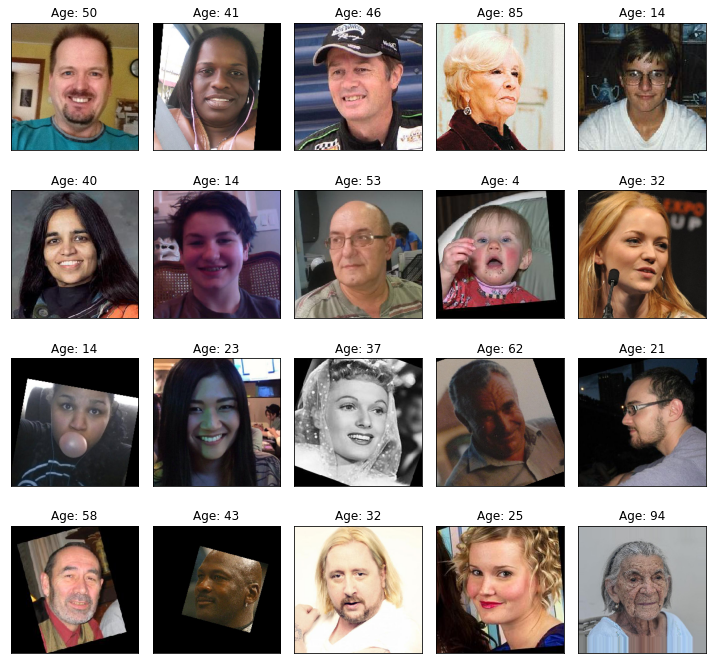

In [4]:
# Напечатаем 15 фотографий и посмотрим, как устроен датасет
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

features, target = next(datagen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(features[i])
    plt.title('Age: {}'.format(target[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены. Отлично, что указан возраст у фотографий!

В датасете содержатся 7591 изображение людей разного возраста. Средний возраст составляет около 31 лет. Медианный возраст — 29 лет, что говорит о том, что половина выборки младше 29 лет, а половина старше. Стандартное отклонение около 17.1, что указывает на довольно большое разнообразие возрастов в датасете.

Минимальный возраст в датасете — 1 год, а максимальный — 100 лет. 25% изображений (25-й перцентиль) представляют людей не старше 20 лет, и 75% изображений (75-й перцентиль) — людей не старше 41 года.

На основании этих данных можно предположить, что модель может быть более точной для определения возраста людей в возрасте от 20 до 41 года, поскольку большинство изображений попадают в этот диапазон.

Нейронные сети чувствительны к входным данным, и их производительность может снижаться, если данные сильно разнообразны или содержат много шума. В нашем случае в датасете присутствует следующие виды изображений:

- Черно-белые фото: модели, обученные на цветных изображениях, могут плохо работать с черно-белыми изображениями, так как они имеют меньше входных признаков (один канал против трех).

- Фотографии в профиль: если большинство изображений в обучающем наборе были сделаны в анфас, модель может испытывать трудности в правильной интерпретации профильных изображений.

- Обрезанные изображения: если часть лица отсутствует на изображении, это может затруднить работу модели, так как она обучена определять возраст, исходя из полного изображения лица.

Все эти факторы добавляют неконсистентность в данные, что может снизить производительность модели. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично !👍:</b>
    
Анализ проведен корректно.
        
Добавлю, общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.
    
Советую изучить базовые возможности аугментаций в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a> или в <a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">статье</a>.     
 </div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = optimizers.Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
               steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Модель определена правильно! Отлично, что применен горизонтальный флип на тренировочной части

```

Found 5694 validated image filenames.
Found 1897 validated image filenames.

<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 178 steps, validate for 60 steps
Epoch 1/20
178/178 - 69s - loss: 227.3247 - mae: 10.8059 - val_loss: 750.1803 - val_mae: 22.4535
Epoch 2/20
178/178 - 51s - loss: 72.9373 - mae: 6.4429 - val_loss: 642.3568 - val_mae: 20.2887
Epoch 3/20
178/178 - 47s - loss: 47.8127 - mae: 5.2470 - val_loss: 343.0694 - val_mae: 13.8238
Epoch 4/20
178/178 - 47s - loss: 35.0574 - mae: 4.4928 - val_loss: 123.8820 - val_mae: 8.6509
Epoch 5/20
178/178 - 48s - loss: 27.5515 - mae: 4.0445 - val_loss: 73.8789 - val_mae: 6.4975
Epoch 6/20
178/178 - 52s - loss: 22.1559 - mae: 3.6079 - val_loss: 73.3685 - val_mae: 6.4214
Epoch 7/20
178/178 - 54s - loss: 17.4198 - mae: 3.2338 - val_loss: 66.3444 - val_mae: 6.1195
Epoch 8/20
178/178 - 42s - loss: 14.8866 - mae: 2.9754 - val_loss: 68.1562 - val_mae: 6.0864
Epoch 9/20
178/178 - 41s - loss: 12.8294 - mae: 2.7474 - val_loss: 68.6207 - val_mae: 6.2789
Epoch 10/20
178/178 - 41s - loss: 10.8493 - mae: 2.5259 - val_loss: 65.3367 - val_mae: 6.0948
Epoch 11/20
178/178 - 40s - loss: 10.2144 - mae: 2.4192 - val_loss: 70.0338 - val_mae: 6.1170
Epoch 12/20
178/178 - 40s - loss: 9.0841 - mae: 2.2801 - val_loss: 65.8693 - val_mae: 6.1404
Epoch 13/20
178/178 - 38s - loss: 8.4632 - mae: 2.1949 - val_loss: 63.3526 - val_mae: 5.9351
Epoch 14/20
178/178 - 38s - loss: 7.6423 - mae: 2.0940 - val_loss: 60.9973 - val_mae: 5.7756
Epoch 15/20
178/178 - 38s - loss: 7.1342 - mae: 1.9909 - val_loss: 64.6030 - val_mae: 6.1545
Epoch 16/20
178/178 - 38s - loss: 6.6023 - mae: 1.9443 - val_loss: 59.2554 - val_mae: 5.6882
Epoch 17/20
178/178 - 38s - loss: 6.3484 - mae: 1.9138 - val_loss: 67.1425 - val_mae: 6.2418
Epoch 18/20
178/178 - 39s - loss: 6.8263 - mae: 1.9598 - val_loss: 58.5152 - val_mae: 5.6743
Epoch 19/20
178/178 - 38s - loss: 6.6025 - mae: 1.8992 - val_loss: 66.5459 - val_mae: 6.0629
Epoch 20/20
178/178 - 38s - loss: 6.6084 - mae: 1.9498 - val_loss: 62.6895 - val_mae: 5.8421

60/60 - 10s - loss: 62.6895 - mae: 5.8421
Test MAE: 5.8421

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

В ходе выполнения проекта по предсказанию возраста по фотографии была использована сверточная нейронная сеть на основе архитектуры ResNet50.

При обучении модели было выполнено 20 эпох. Наблюдалось уменьшение значения функции потерь и метрики MAE на обучающей выборке с течением времени, что свидетельствует об успешном процессе обучения.

Тестовая выборка показала среднюю абсолютную ошибку (MAE) равную 5.8421. Это означает, что в среднем модель ошибается на примерно 6 лет при определении возраста человека по фотографии.

Такой результат можно считать приемлемым для заказчика, но для задач, требующих более точного определения возраста, потребуется улучшение модели. Для этого можно поэкспериментировать с гиперпараметрами, использовать другие архитектуры сверточных сетей, а также применить дополнительные методы аугментации изображений.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.
     
</div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Спасибо за положительный отзыв) Очень приятно получать такую обратную связь. Спасибо за возможность внести правки, но я думаю, что готова перейти к следующему этапу)
</div> 

<br/>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы